In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
mnist=tf.keras.datasets.mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train_full=np.expand_dims(X_train_full,axis=-1).astype(np.float32)/255
X_test=np.expand_dims(X_test,axis=-1).astype(np.float32) /255
X_train,X_valid=X_train_full[:-5000],X_train_full[-5000:]
y_train,y_valid=y_train_full[:-5000],y_train_full[-5000:]

In [4]:
X_train.shape

(55000, 28, 28, 1)

In [5]:
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    tf.keras.layers.Conv2D(64,padding='same',kernel_size=7,
                           activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,padding='same',kernel_size=3,
                           activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(128,padding='same',kernel_size=3,
                           activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256,padding='same',kernel_size=3,
                           activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(256,padding='same',kernel_size=3,
                           activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=128,kernel_initializer='he_normal'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=64,kernel_initializer='he_normal'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10,activation='softmax')
])


In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))
score=model.evaluate(X_test,y_test)
X_new=X_test[:10]
y_pred=model.predict(X_new)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - accuracy: 0.7985 - loss: 0.6574 - val_accuracy: 0.9812 - val_loss: 0.0680
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.9599 - loss: 0.1514 - val_accuracy: 0.9914 - val_loss: 0.0308
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9682 - loss: 0.1195 - val_accuracy: 0.9848 - val_loss: 0.0630
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9738 - loss: 0.0976 - val_accuracy: 0.9882 - val_loss: 0.0441
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9798 - loss: 0.0785 - val_accuracy: 0.9928 - val_loss: 0.0260
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9817 - loss: 0.0721 - val_accuracy: 0.9866 - val_loss: 0.0515
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9825 - loss: 0.0674 - val_accuracy: 0.9938 - val_loss: 0.0295
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9845 - loss: 

In [8]:
y_train.shape

(55000,)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2304)                │           9,216 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,260,961 (16.25 MB)

 Trainable params: 1,418,698 (5.41 MB)

 Non-trainable params: 4,864 (19.00 KB)

 Optimizer params: 2,837,399 (10.82 MB)

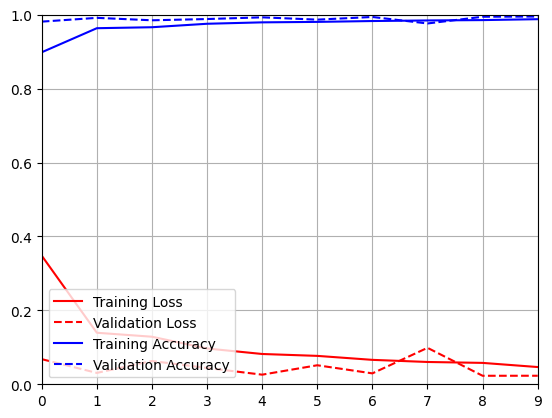

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r--', label='Validation Loss')
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b--', label='Validation Accuracy')

plt.xlim([0, len(history.history['loss']) - 1])
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

#par

In [11]:
from functools import partial

DefaultConv2D=partial(tf.keras.layers.Conv2D,kernel_size=3,strides=1,
                      padding='same',kernel_initializer='he_normal',use_bias=False)

class ResidualUnit(tf.keras.layers.Layer):
  def __init__(self,filters,strides=1,activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.activation=tf.keras.activations.get(activation)
    self.main_layers=[
        DefaultConv2D(filters,strides=strides),
        tf.keras.layers.BatchNormalization(),
        self.activation,
        DefaultConv2D(filters),
        tf.keras.layers.BatchNormalization()
    ]
    self.skip_layers=[]
    if strides>1:
      self.skip_layers=[
          DefaultConv2D(filters,kernel_size=1,strides=strides),
          tf.keras.layers.BatchNormalization()
      ]
  def call(self,inputs):
    Z=inputs
    for layer in self.main_layers:
      Z=layer(Z)
    skip_Z=inputs
    for layer in self.skip_layers:
      skip_Z=layer(skip_Z)
    return self.activation(Z+skip_Z)

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28,1]),
    DefaultConv2D(64,kernel_size=7,strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=3,strides=2,padding='same')
])
prev_filters=64
for filters in [64]*3+[128]*4+[256]*6+[512]*3:
  strides=1 if filters==prev_filters else 2
  model.add(ResidualUnit(filters,strides=strides))
  prev_filters=filters

model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))
score=model.evaluate(X_test,y_test)
X_new=X_test[:10]
y_pred=model.predict(X_new)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 96s 35ms/step - accuracy: 0.8915 - loss: 0.4218 - val_accuracy: 0.3414 - val_loss: 7.0569
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 53s 25ms/step - accuracy: 0.9662 - loss: 0.1236 - val_accuracy: 0.9678 - val_loss: 0.1138
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9794 - loss: 0.0714 - val_accuracy: 0.9828 - val_loss: 0.0694
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9837 - loss: 0.0573 - val_accuracy: 0.6856 - val_loss: 1.8454
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9822 - loss: 0.0654 - val_accuracy: 0.9696 - val_loss: 0.1130
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9878 - loss: 0.0448 - val_accuracy: 0.9916 - val_loss: 0.0383
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9900 - loss: 0.0333 - val_accuracy: 0.9880 - val_loss: 0.0382
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9932 -